In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/data_syd/badgery_1h.csv'

In [4]:
df = pd.read_csv(data)

# Assuming the precipitation column is named 'precip' — replace if different
data_column = 'Precipitation'  # change this to match the correct column in your CSV

Columns in dataset: Index(['Time', 'Precipitation'], dtype='object')


In [13]:
# Step 3: Drop missing values and apply the filter p > 0.2
data = df[data_column].dropna()
filtered_data = data[data > 0.2]

# Step 4: Calculate the 95th percentile
percentile_95 = np.percentile(filtered_data, 95)
extreme_data = filtered_data[filtered_data > percentile_95]

print(f"95th percentile (p > 0.2 mm): {percentile_95:.2f}")
print(f"Number of values above 95th percentile: {len(extreme_data)}")


95th percentile (p > 0.2 mm): 6.40
Number of values above 95th percentile: 310


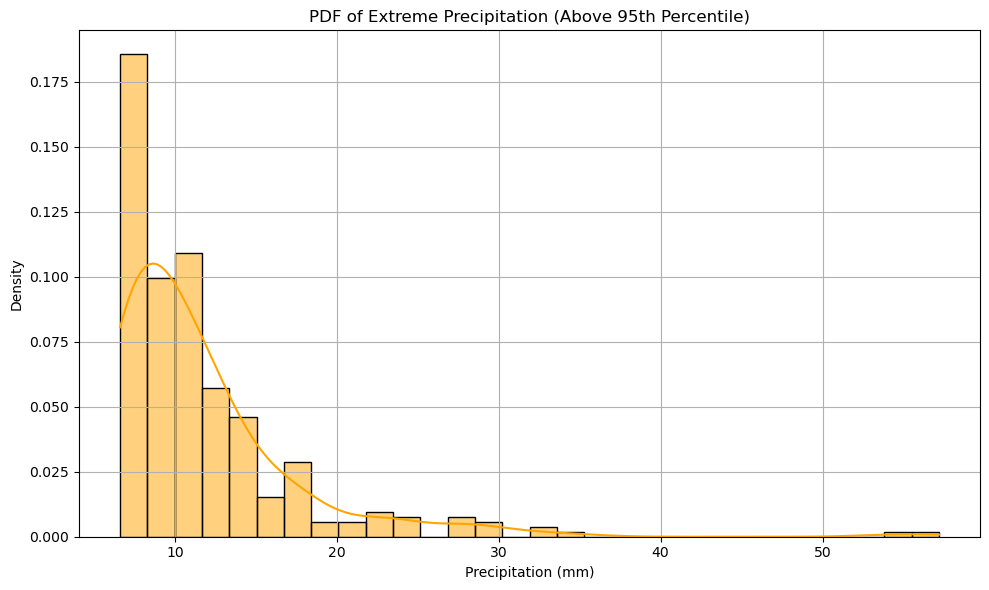

In [14]:
# Step 5: Plot PDF of values > 95th percentile
plt.figure(figsize=(10, 6))
sns.histplot(extreme_data, kde=True, stat="density", bins=30, color='orange', edgecolor='black')
plt.title("PDF of Extreme Precipitation (Above 95th Percentile)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

#  SYD: Obs and models

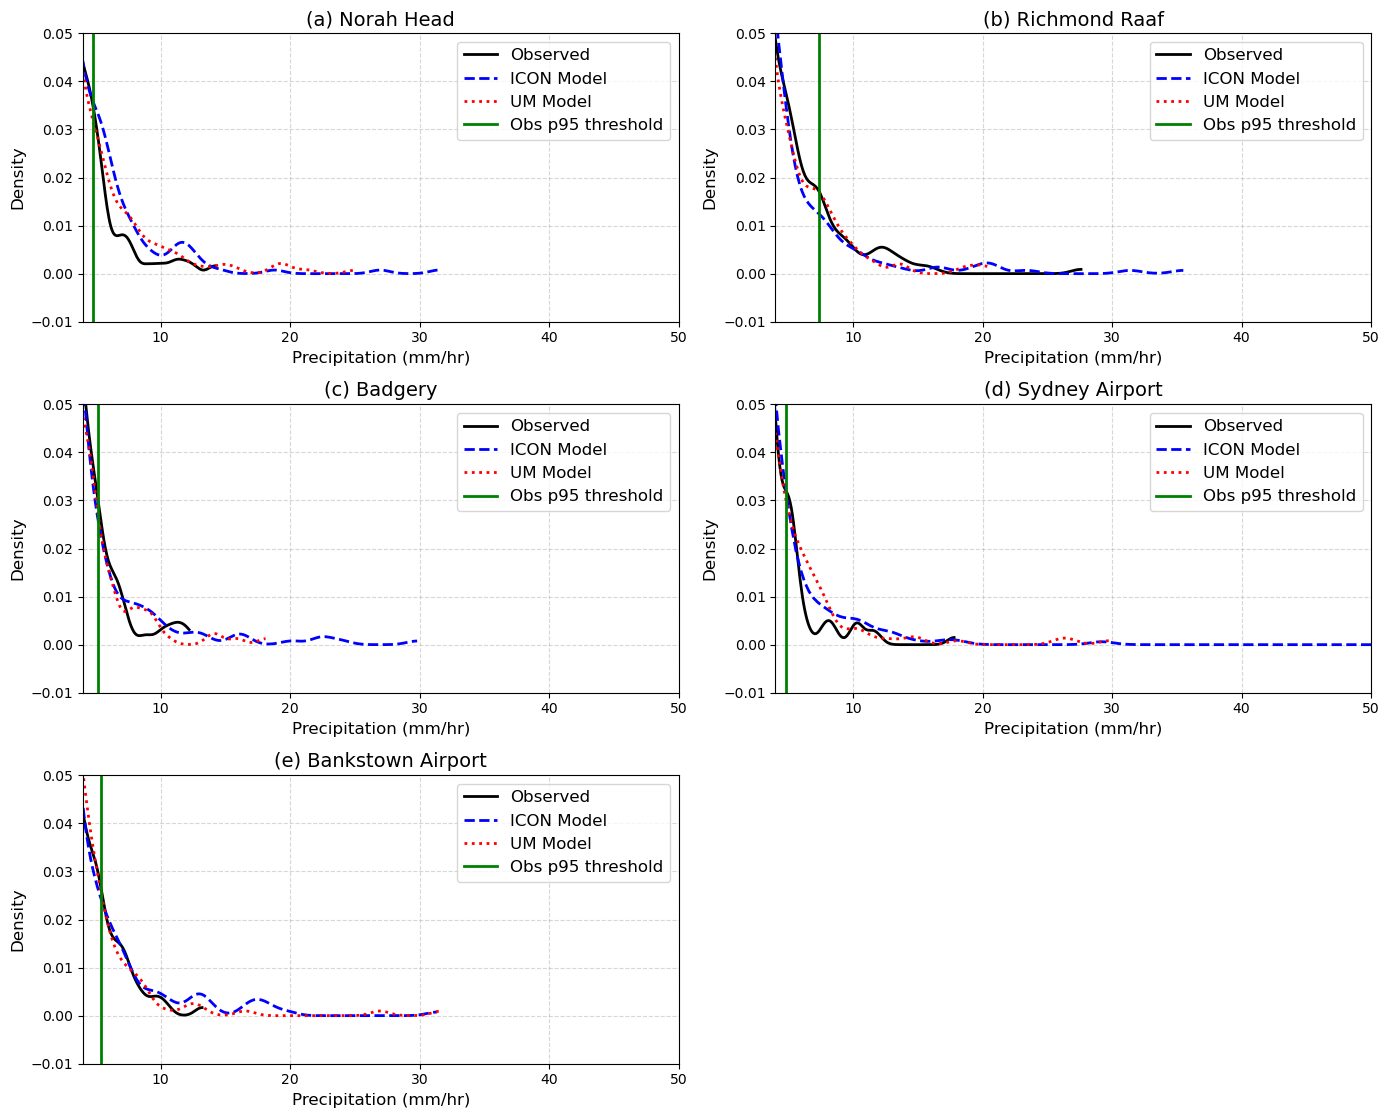

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# File paths
obs_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/norah_1h.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/richmond_1h.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/badgery_1h.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/sydney_1h.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Sydney/bankstown_1h.csv'
}

germany_model_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Norah_Head_AWS_z10.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Richmond_RAAF_z10.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Badgerys_Creek_AWS_z10.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Sydney_Airport_AMO_z10.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_sydney_z10/germany_node_Bankstown_Airport_AWS_z10.csv'
}

uk_model_file_paths = {
    'norah_head': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Norah_Head_AWS_z10.csv',
    'richmond_raaf': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Richmond_RAAF_z10.csv',
    'badgery': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Badgerys_Creek_AWS_z10.csv',
    'sydney_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Sydney_Airport_AMO_z10.csv',
    'bankstown_airport': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_sydney_z10/uk_node_Bankstown_Airport_AWS_z10.csv'
}

obs_column = 'Precipitation'
model_column = 'value'
start_date = '2020-03-01'
end_date = '2021-02-28'
thresholds_95 = {}
thresholds_99 = {}

# Step 1: Compute 95th percentile thresholds from OBS
for site, path in obs_file_paths.items():
    df = pd.read_csv(path, parse_dates=['Time'])
    df.set_index('Time', inplace=True)
    df[obs_column] = pd.to_numeric(df[obs_column], errors='coerce')
    data = df.loc[start_date:end_date][obs_column].dropna()
    filtered_data = data[data > 0.2]
    if not filtered_data.empty:
        thresholds_95[site] = np.percentile(filtered_data, 95)
        thresholds_99[site] = np.percentile(filtered_data, 99)
        
# Step 2: Plot subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, site in enumerate(obs_file_paths.keys()):
    ax = axes[i]
    obs_95 = thresholds_95[site]
    obs_99 = thresholds_99[site]

    # Load OBS
    df_obs = pd.read_csv(obs_file_paths[site], parse_dates=['Time'])
    df_obs.set_index('Time', inplace=True)
    df_obs[obs_column] = pd.to_numeric(df_obs[obs_column], errors='coerce')
    obs_data = df_obs.loc[start_date:end_date][obs_column].dropna()
    obs_extreme = obs_data[(obs_data > 0.2)]

    # Load GERMANY model
    df_germ = pd.read_csv(germany_model_file_paths[site], parse_dates=['time'])
    df_germ.set_index('time', inplace=True)
    df_germ[model_column] = pd.to_numeric(df_germ[model_column], errors='coerce')
    germ_data = df_germ.loc[start_date:end_date][model_column].dropna()
    germ_extreme = germ_data[(germ_data > 0.2)]

    # Load UK model
    df_uk = pd.read_csv(uk_model_file_paths[site], parse_dates=['time'])
    df_uk.set_index('time', inplace=True)
    df_uk[model_column] = pd.to_numeric(df_uk[model_column], errors='coerce')
    uk_data = df_uk.loc[start_date:end_date][model_column].dropna()
    uk_extreme = uk_data[(uk_data > 0.2)]

    # KDE plots
    if len(obs_extreme) > 1:
        x = np.linspace(obs_extreme.min(), obs_extreme.max(), 200)
        ax.plot(x, gaussian_kde(obs_extreme)(x), label='Observed', linestyle='-', linewidth=2, color='black')

    if len(germ_extreme) > 1:
        x = np.linspace(germ_extreme.min(), germ_extreme.max(), 200)
        ax.plot(x, gaussian_kde(germ_extreme)(x), label='ICON Model', linestyle='--', linewidth=2, color='blue')

    if len(uk_extreme) > 1:
        x = np.linspace(uk_extreme.min(), uk_extreme.max(), 200)
        ax.plot(x, gaussian_kde(uk_extreme)(x), label='UM Model', linestyle=':', linewidth=2, color='red')

    # Add vertical line for observed 95th percentile threshold
    ax.axvline(obs_95, color='green', linestyle='-', linewidth=2, label='Obs p95 threshold')
    # ax.axvline(obs_99, color='pink', linestyle='-', linewidth=2, label='Obs p99 threshold')

    subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
    ax.set_title(f"{subplot_labels[i]} {site.replace('_', ' ').title()}", fontsize=14)
    ax.set_xlabel("Precipitation (mm/hr)", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.set_xlim(4, 50)
    ax.set_ylim(-0.01, 0.05)
    
# Remove any unused subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.suptitle("Extreme Precipitation (>95th Percentile)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# plt.savefig("/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Plots/p95_syd_5_stations.png", format='png', dpi=300, bbox_inches='tight')

plt.show()


# Fiji: Obs and model

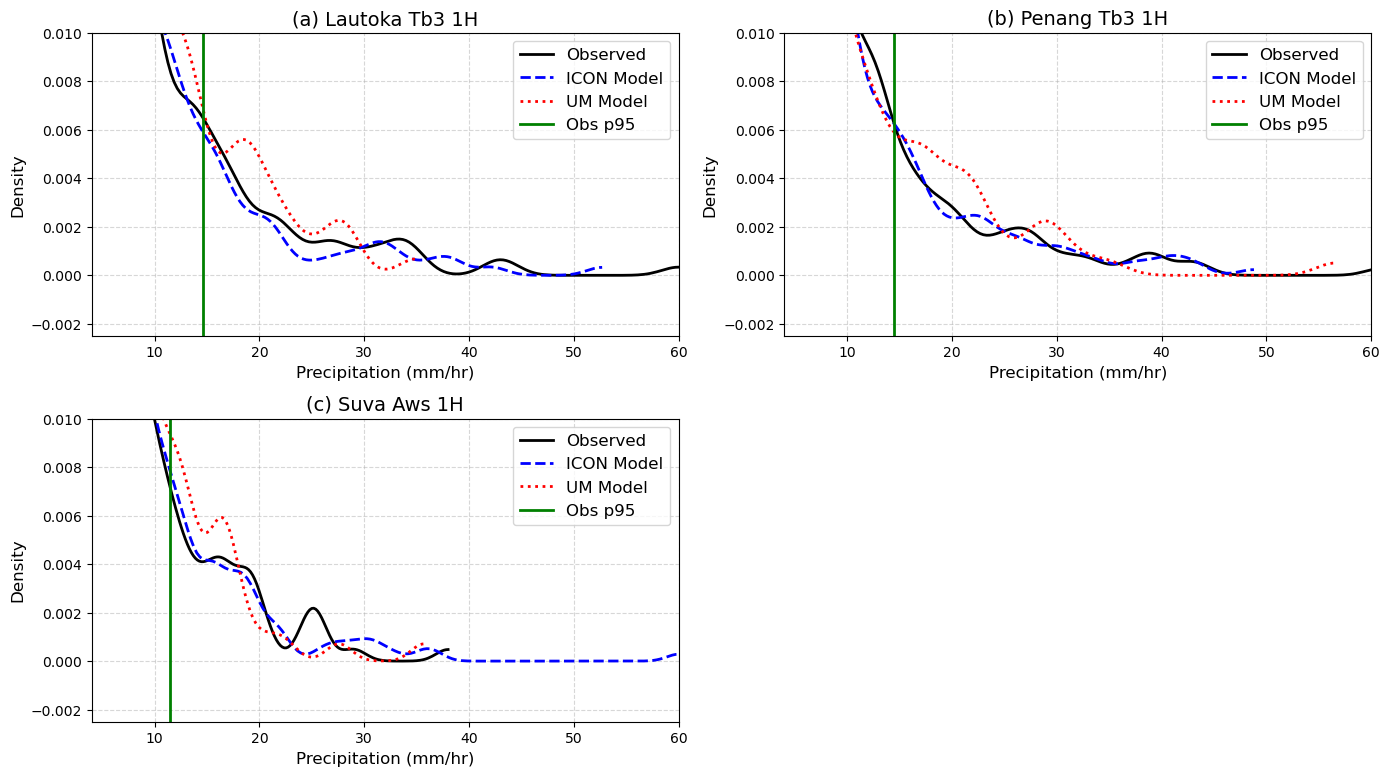

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# File paths
obs_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/lautoka_tb3_1H.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/penang_tb3_1H.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/suva_aws_1H.csv',
}

germany_model_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Lautoka_TB3_z10.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Penang_TB3_z10.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/germney_model_fiji_z10/germany_node_Suva_AWS_z10.csv',
}

uk_model_file_paths = {
    'lautoka_tb3_1H': '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Lautoka_TB3_z10.csv',
    'penang_tb3_1H':  '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Penang_TB3_z10.csv',
    'suva_aws_1H':    '/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Data/uk_model_fiji_z10/uk_node_Suva_AWS_z10.csv',
}

obs_column   = 'rain_1h_mm'
model_column = 'value'
start_date   = '2020-03-01'
end_date     = '2021-02-28'

thresholds_95 = {}
thresholds_99 = {}

# Step 1: Compute 95th/99th percentiles from OBS
for site, path in obs_file_paths.items():
    df = pd.read_csv(path, parse_dates=['datetime'])
    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)                             # ← ensure monotonic index
    df[obs_column] = pd.to_numeric(df[obs_column], errors='coerce')
    
    # now label slicing works
    data = df.loc[start_date:end_date, obs_column].dropna()
    filtered = data[data > 0.2]
    if not filtered.empty:
        thresholds_95[site] = np.percentile(filtered, 95)
        thresholds_99[site] = np.percentile(filtered, 99)

# Step 2: Plot KDE subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, site in enumerate(obs_file_paths.keys()):
    ax = axes[i]
    obs_p95 = thresholds_95.get(site, np.nan)
    obs_p99 = thresholds_99.get(site, np.nan)

    # --- OBSERVATIONS ---
    df_obs = pd.read_csv(obs_file_paths[site], parse_dates=['datetime'])
    df_obs.set_index('datetime', inplace=True)
    df_obs.sort_index(inplace=True)                         # ← ensure monotonic
    df_obs[obs_column] = pd.to_numeric(df_obs[obs_column], errors='coerce')
    obs_series = df_obs.loc[start_date:end_date, obs_column].dropna()
    obs_extreme = obs_series[obs_series > 0.2]

    # --- GERMANY MODEL ---
    df_germ = pd.read_csv(germany_model_file_paths[site], parse_dates=['time'])
    df_germ.set_index('time', inplace=True)
    df_germ.sort_index(inplace=True)                       # ← ensure monotonic
    df_germ[model_column] = pd.to_numeric(df_germ[model_column], errors='coerce')
    germ_series = df_germ.loc[start_date:end_date, model_column].dropna()
    germ_extreme = germ_series[germ_series > 0.2]

    # --- UK MODEL ---
    df_uk = pd.read_csv(uk_model_file_paths[site], parse_dates=['time'])
    df_uk.set_index('time', inplace=True)
    df_uk.sort_index(inplace=True)                         # ← ensure monotonic
    df_uk[model_column] = pd.to_numeric(df_uk[model_column], errors='coerce')
    uk_series = df_uk.loc[start_date:end_date, model_column].dropna()
    uk_extreme = uk_series[uk_series > 0.2]

    # --- KDE PLOTS ---
    x_obs = np.linspace(obs_extreme.min(), obs_extreme.max(), 200) if len(obs_extreme)>1 else None
    x_germ = np.linspace(germ_extreme.min(), germ_extreme.max(), 200) if len(germ_extreme)>1 else None
    x_uk   = np.linspace(uk_extreme.min(), uk_extreme.max(), 200)   if len(uk_extreme)>1 else None

    if x_obs is not None:
        ax.plot(x_obs, gaussian_kde(obs_extreme)(x_obs), label='Observed', linestyle='-', linewidth=2, color='black')
    if x_germ is not None:
        ax.plot(x_germ, gaussian_kde(germ_extreme)(x_germ), label='ICON Model', linestyle='--', linewidth=2, color='blue')
    if x_uk is not None:
        ax.plot(x_uk,   gaussian_kde(uk_extreme)(x_uk),   label='UM Model',   linestyle=':', linewidth=2, color='red')

    # percentiles
    ax.axvline(obs_p95, color='green', linestyle='-', linewidth=2, label='Obs p95')
    # ax.axvline(obs_p99, color='purple', linestyle='--', linewidth=2, label='Obs p99')

    # subplot formatting
    labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
    ax.set_title(f"{labels[i]} {site.replace('_', ' ').title()}", fontsize=14)
    ax.set_xlabel("Precipitation (mm/hr)", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(fontsize=12)
    ax.set_xlim(4, 60)
    ax.set_ylim(-0.0025, 0.01)

# remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.savefig("/home/561/lk5320/hk25-AusNode-ExtremePrecipitation/Plots/p95_fiji_3_stations.png", format='png', dpi=300, bbox_inches='tight')

plt.show()
